<a href="https://colab.research.google.com/github/Creatrohit9/2-CAPSTON-ROHIT-BHADAURIYA-NYC-TAXI-TRIP-TIME-PRIDICTION/blob/main/NYC_TAXI_TRIP_TIME_PRIDICTION_ROHITBHADAURIYA_2_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

First we mount the drive then 

In [ ]:
!pip install klib

     |████████████████████████████████| 22.3 MB 58.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
!pip install mito

     |████████████████████████████████| 371 kB 6.9 MB/s 
  ERROR: Failed building wheel for mito
  Running setup.py clean for mito
Failed to build mito
    Running setup.py install for mito ... done
  DEPRECATION: mito was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import klib
import mito
from mito import*   # it takes all the nessecary function from mito
import numpy as np
from numpy import math
import seaborn as sns
import xgboost                                              # extreme gradient boosting 
from sklearn.preprocessing import MinMaxScaler              # scaling the value of features
from sklearn.model_selection import train_test_split # used for dividing the feature in train and tested
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import warnings
from pylab import rcParams
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')


In [5]:
taxi_df=pd.read_csv('/content/drive/MyDrive/2-CAPSTON PROJECT SUPERWISED ML REGRESSION/Copy of NYC Taxi Data.csv')

# **Exploratory Data Analysis for Machine learning model**

In [6]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
taxi_df.describe

<bound method NDFrame.describe of                 id  vendor_id  ... store_and_fwd_flag trip_duration
0        id2875421          2  ...                  N           455
1        id2377394          1  ...                  N           663
2        id3858529          2  ...                  N          2124
3        id3504673          2  ...                  N           429
4        id2181028          2  ...                  N           435
...            ...        ...  ...                ...           ...
1458639  id2376096          2  ...                  N           778
1458640  id1049543          1  ...                  N           655
1458641  id2304944          2  ...                  N           764
1458642  id2714485          1  ...                  N           373
1458643  id1209952          1  ...                  N           198

[1458644 rows x 11 columns]>

In [8]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [9]:
taxi_df.shape

(1458644, 11)

In [10]:
klib.corr_mat(taxi_df)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.00,0.29,0.01,0.00,0.00,0.00,0.02
passenger_count,0.29,1.00,0.00,-0.01,-0.00,-0.00,0.01
pickup_longitude,0.01,0.00,1.00,0.02,0.78,0.10,0.03
pickup_latitude,0.00,-0.01,0.02,1.00,0.11,0.49,-0.03
dropoff_longitude,0.00,-0.00,0.78,0.11,1.00,0.12,0.01
dropoff_latitude,0.00,-0.00,0.10,0.49,0.12,1.00,-0.02
trip_duration,0.02,0.01,0.03,-0.03,0.01,-0.02,1.00


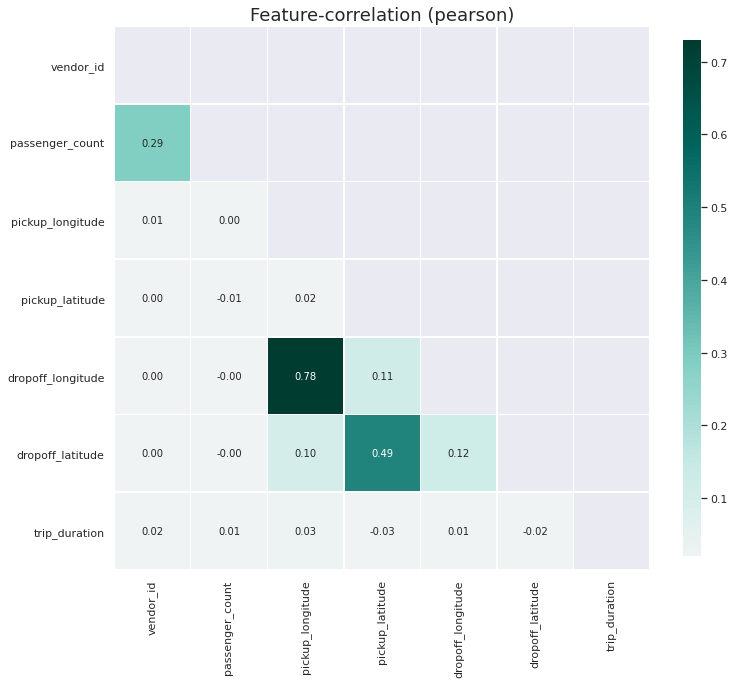

In [11]:
klib.corr_plot(taxi_df)

In [12]:
klib.missingval_plot(taxi_df)

No missing values found in the dataset.


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


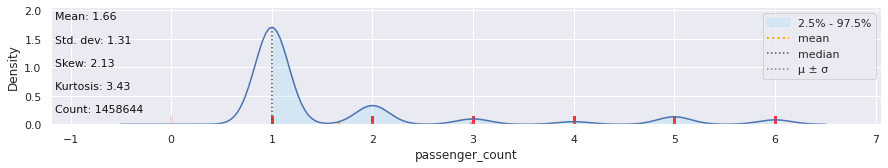

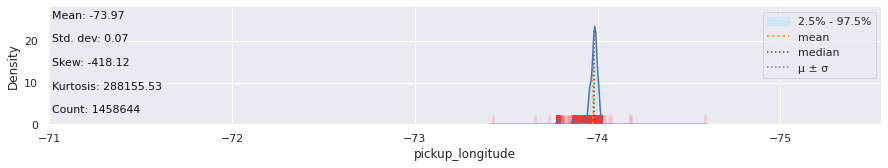

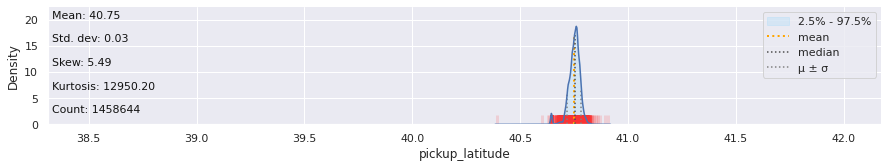

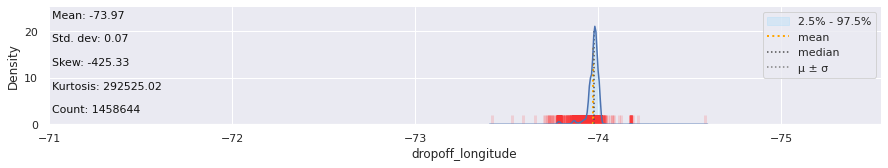

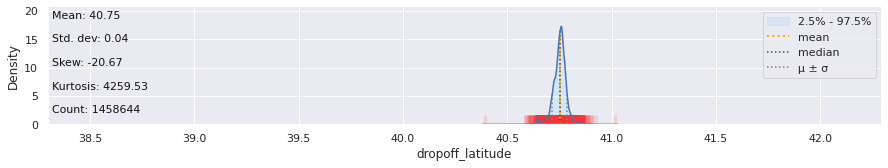

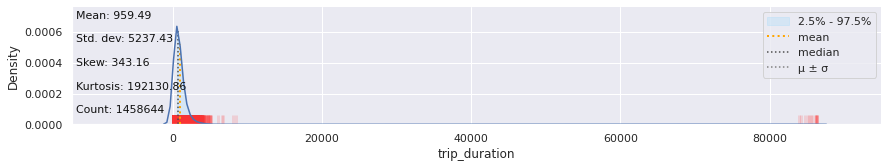

In [13]:
klib.dist_plot(taxi_df)

GridSpec(6, 4)

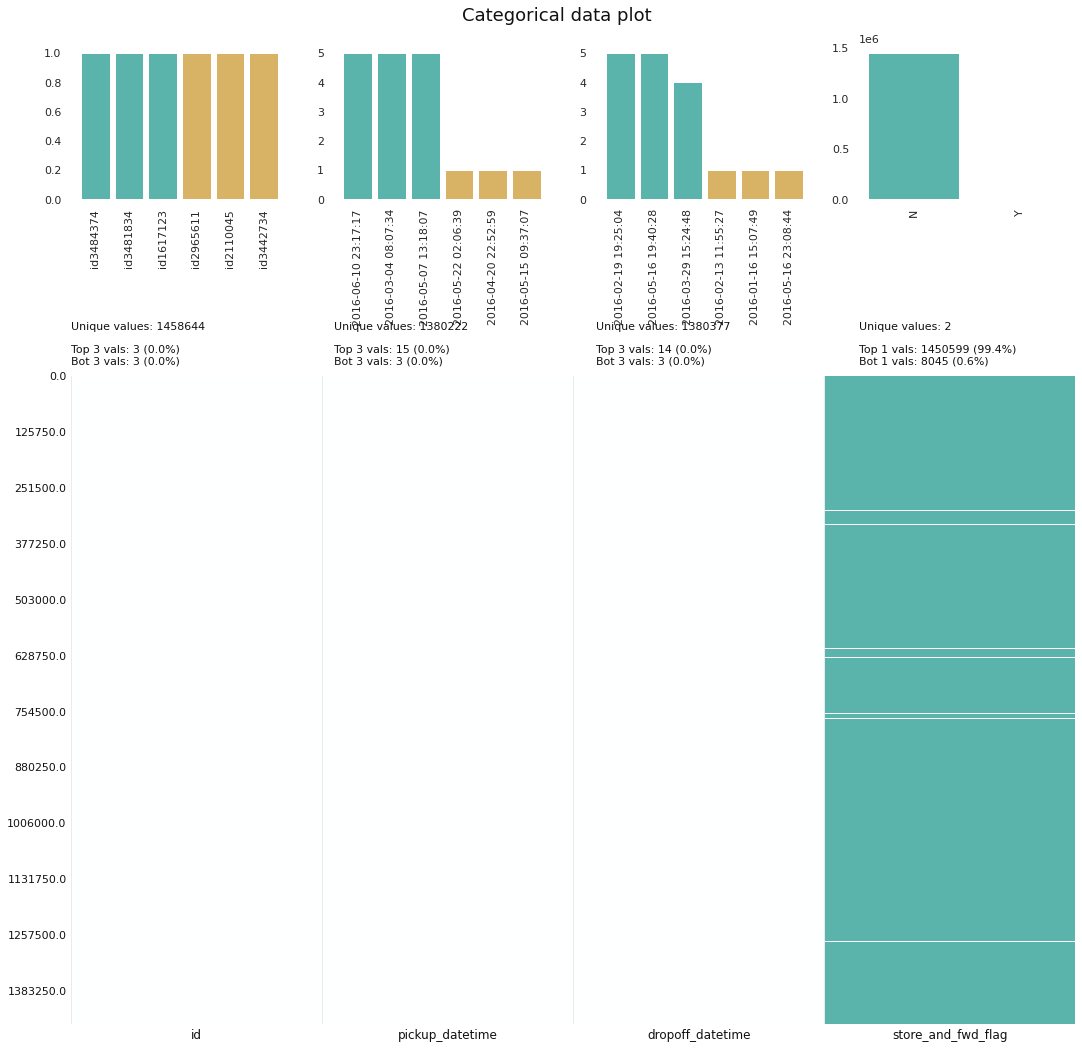

In [14]:
klib.cat_plot(taxi_df)

In [15]:
taxi_df.drop_duplicates(inplace=True)

In [16]:
taxi_df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [17]:
taxi_df[taxi_df['passenger_count']==0].count

<bound method DataFrame.count of                 id  vendor_id  ... store_and_fwd_flag trip_duration
62744    id3917283          2  ...                  N         85901
136519   id3645383          2  ...                  N             4
194288   id2840829          2  ...                  N           155
217765   id3762593          1  ...                  N          2251
263809   id2154895          1  ...                  N             8
278290   id0796773          1  ...                  N             9
301600   id2091096          2  ...                  N          2072
303133   id0414625          2  ...                  N            15
337809   id0271506          2  ...                  N            41
375972   id3176865          2  ...                  N            15
383407   id3493269          2  ...                  N             7
412172   id2247129          2  ...                  N          1556
415843   id1794493          2  ...                  N            22
437735   id2891

In [18]:
taxi_df=taxi_df[taxi_df['passenger_count']!=0]

In [19]:
taxi_df['pickup_datetime'][0]

'2016-03-14 17:24:55'

converting the string date time to date time formate and save it in row

In [20]:
taxi_df['pickup_datetime']=pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df['dropoff_datetime']=pd.to_datetime(taxi_df['dropoff_datetime'])

In [21]:
taxi_df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


now we look at the target variable that is trip time ,which have outlier so lets plot a graph for it.

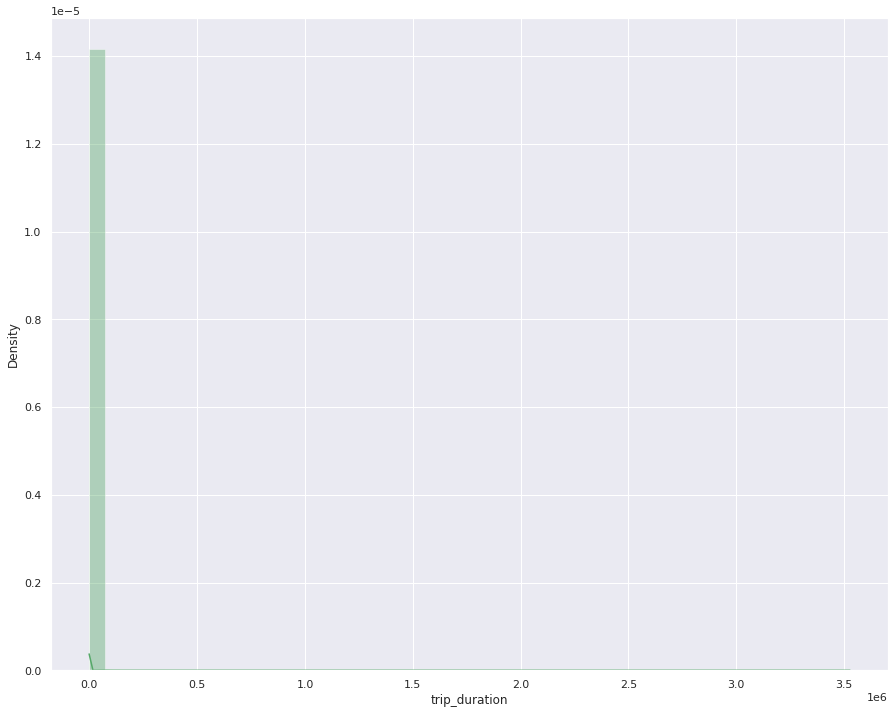

In [47]:
plt.figure(figsize=(15,12))
sns.distplot(taxi_df['trip_duration'],color='G')

WE USE LOG TRANSFORMATION FOR NORMALIZED THE DATA BEACAUSE IT IS 

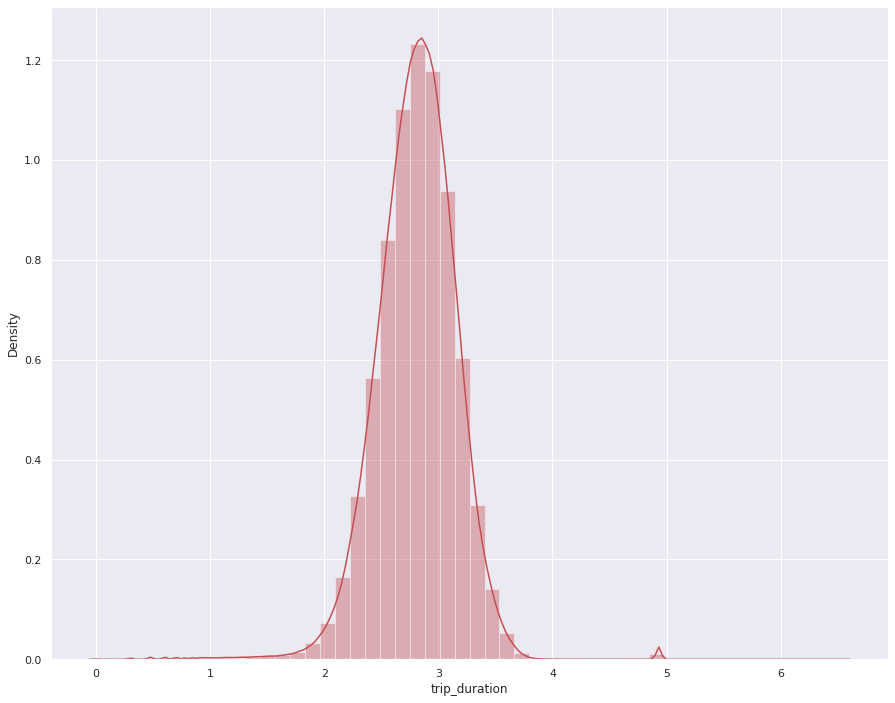

In [23]:
plt.figure(figsize=(15,12))
sns.distplot(np.log10(taxi_df['trip_duration']),color='R')

make a box plot for know about the outlier from the numerical feature

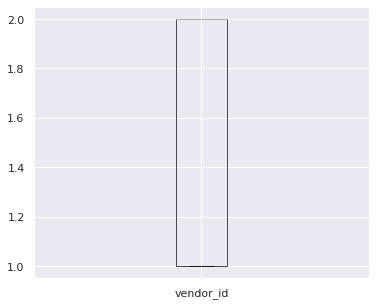

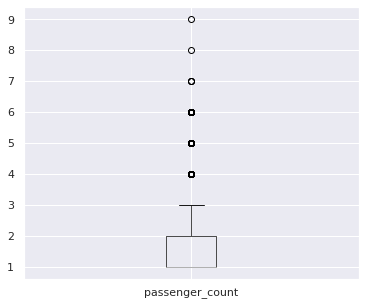

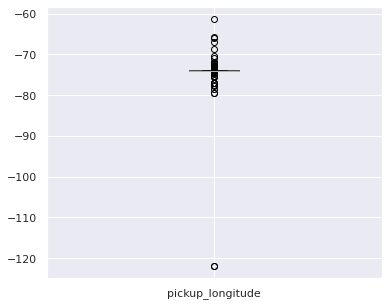

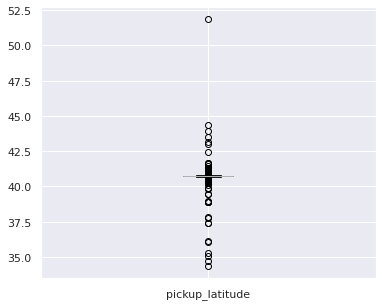

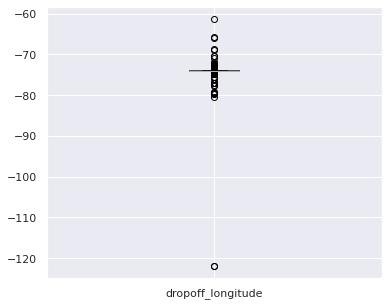

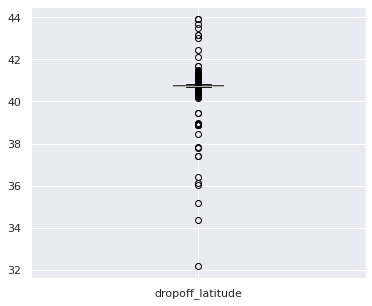

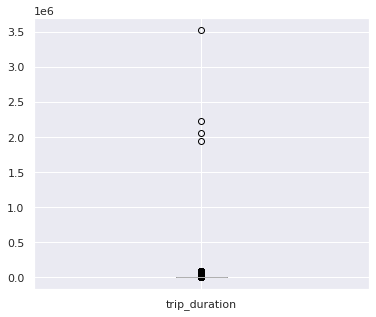

In [29]:
#plot a box plot
for col in taxi_df.describe().columns:
  visual1=plt.figure(figsize=(6,5))
  ax=visual1.gca()
  taxi_df.boxplot(column=col,ax=ax)
plt.show()


Okay so what we know now :
* Vendor ID has no outlier.
* In passenger count 4 and more passengers are being treated as outliers.
* pickup_longitude and pickup_latitude has outliers as well.
* dropoff_longitude and dropoff_latitude has outliers too.
* Our target variable trip_duration has alot of outliers 

Now it's time for our white blood cells to get in action and remove these outliers. So our Outlier treatment will be using ***IQR(inter-quartile range)*** method

In [31]:
#lets take out all numerical features and make a bar plot for it
taxi_feature=taxi_df.describe().columns
taxi_feature

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

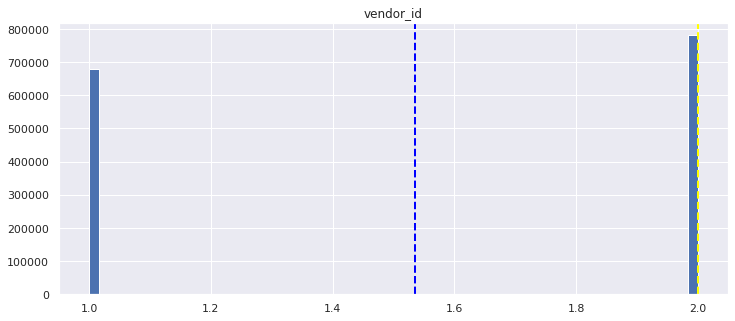

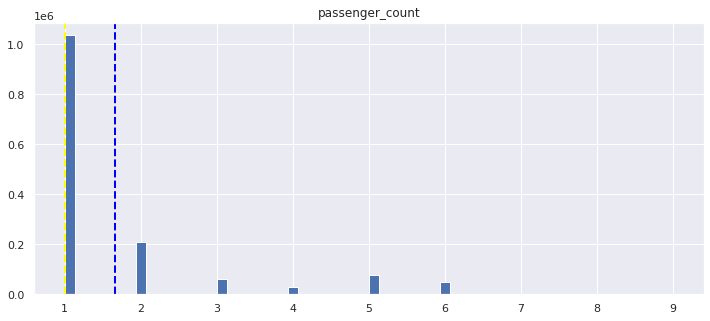

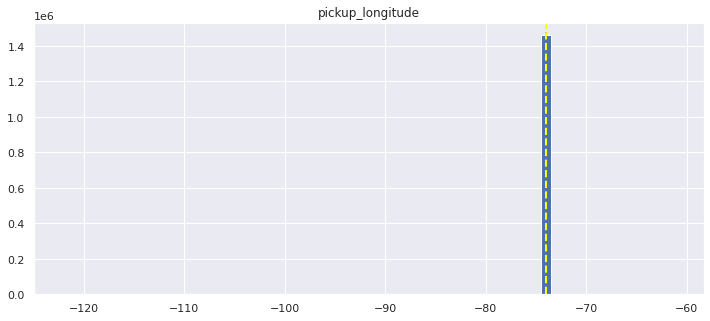

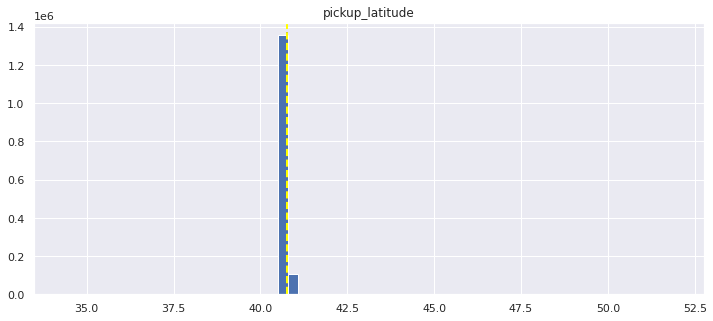

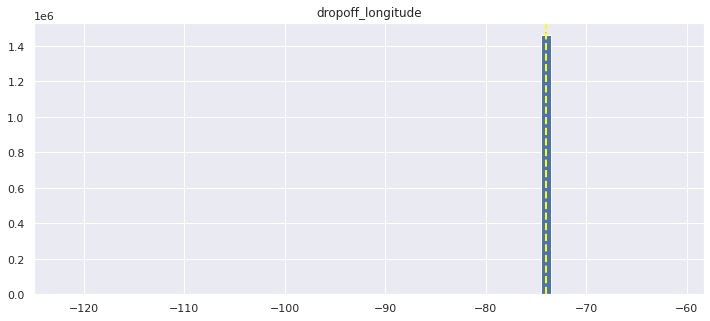

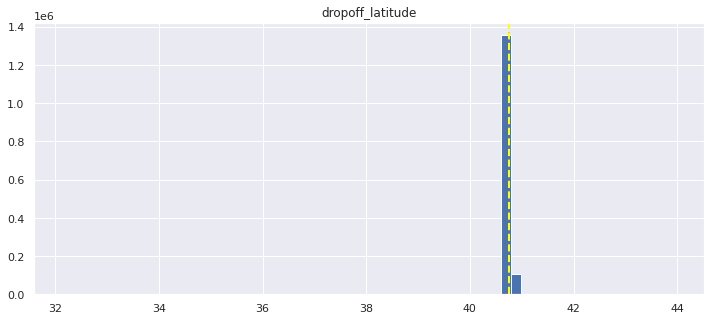

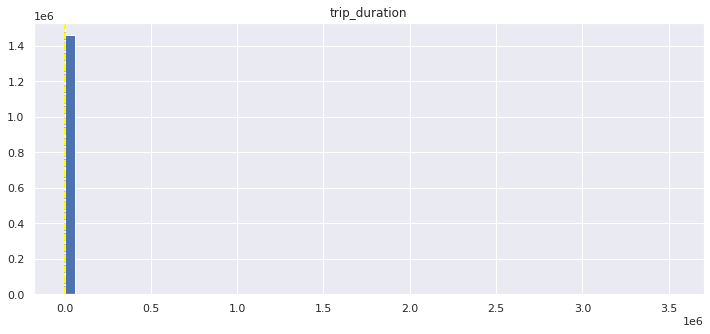

In [41]:
# make a bar plot for each features
for col in taxi_feature:
  visual2=plt.figure(figsize=(12,5))
  ax=visual2.gca()
  feature_taxi=taxi_df[col]
  feature_taxi.hist(bins=60,ax=ax)
  ax.axvline(feature_taxi.mean(),color='blue',linestyle='dashed',linewidth=2)
  ax.axvline(feature_taxi.median(),color='yellow',linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show()  

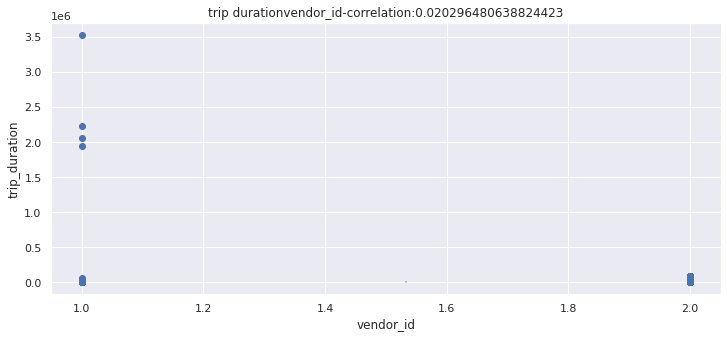

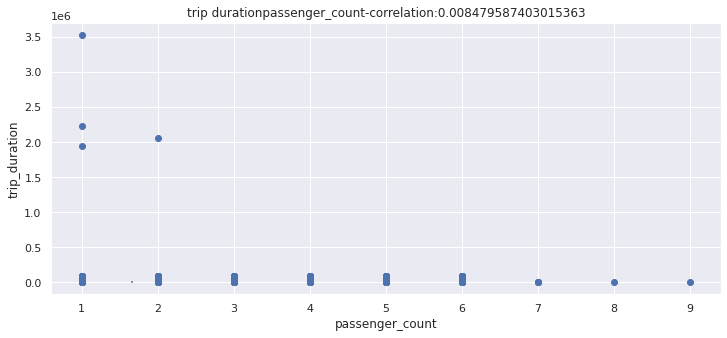

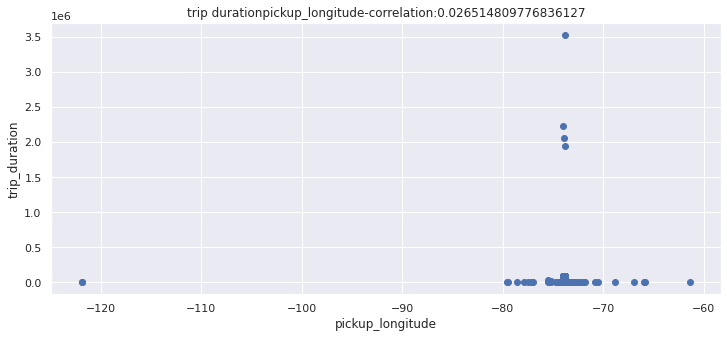

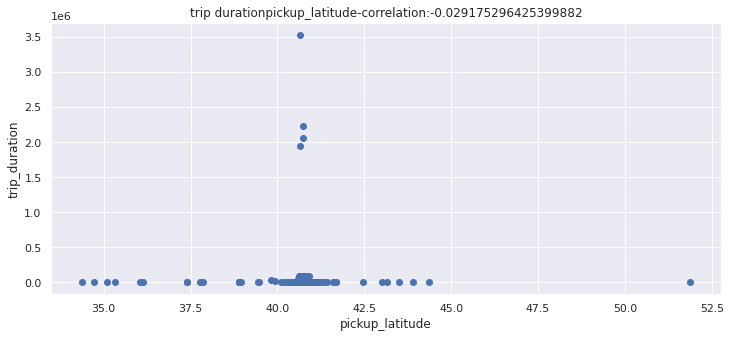

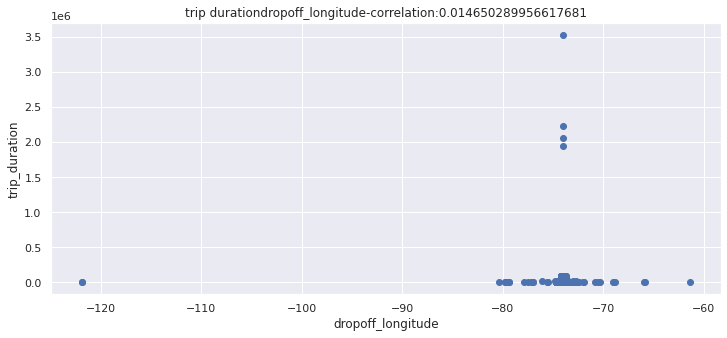

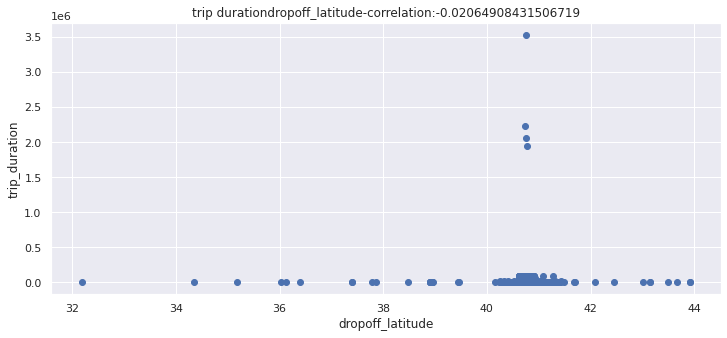

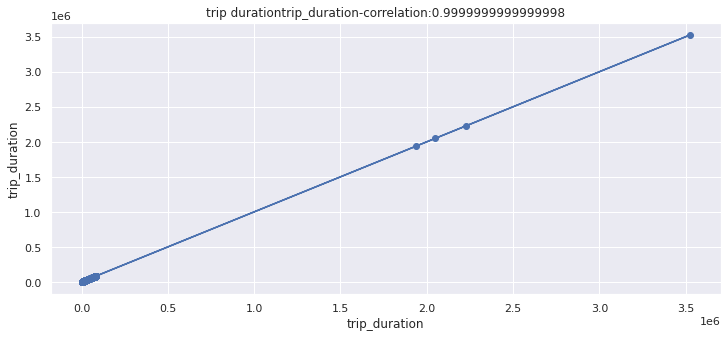

In [49]:
# let plot a scatter plot for making more understanding about our data
for col in taxi_feature:
  visual3=plt.figure(figsize=(12,5))
  ax=visual3.gca()
  feature_taxi=taxi_df[col]
  label=taxi_df['trip_duration']
  correlation=feature_taxi.corr(label)
  plt.scatter(x=feature_taxi,y=label)
  plt.xlabel(col)
  plt.ylabel('trip_duration')
  ax.set_title('trip duration' + col + '-correlation:' + str(correlation))
  p=np.polyfit(taxi_df['trip_duration'],taxi_df[col],1)
  y=np.poly1d(p)(taxi_df[col])
  plt.plot(y,taxi_df[col])
plt.show()  